In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
#import pyspark
#from pyspark import SparkContext
#from pyspark.sql import SQLContext
#from pyspark.sql import *
#import org.apache.spark.sql.types                         #// include the Spark Types to define our schema
#import org.apache.spark.sql.functions._ 

from sklearn.model_selection import train_test_split
from pyspark.sql.functions import col, countDistinct
import nltk

from nltk.tokenize import TreebankWordTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
#from pyspark.ml.feature import HashingTF, IDF, Tokenizer
#from pyspark.ml.feature import StringIndexer
#from pyspark.ml import Pipeline


from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from string import punctuation
from sklearn import svm
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
from nltk import ngrams
from itertools import chain
from wordcloud import WordCloud

In [24]:
rev =pd.read_json("Grocery_and_Gourmet_Food_5.json" ,lines=True)

In [25]:
rev.head()

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,616719923X,"[0, 0]",4,Just another flavor of Kit Kat but the taste i...,"06 1, 2013",A1VEELTKS8NLZB,Amazon Customer,Good Taste,1370044800
1,616719923X,"[0, 1]",3,I bought this on impulse and it comes from Jap...,"05 19, 2014",A14R9XMZVJ6INB,amf0001,"3.5 stars, sadly not as wonderful as I had hoped",1400457600
2,616719923X,"[3, 4]",4,Really good. Great gift for any fan of green t...,"10 8, 2013",A27IQHDZFQFNGG,Caitlin,Yum!,1381190400
3,616719923X,"[0, 0]",5,"I had never had it before, was curious to see ...","05 20, 2013",A31QY5TASILE89,DebraDownSth,Unexpected flavor meld,1369008000
4,616719923X,"[1, 2]",4,I've been looking forward to trying these afte...,"05 26, 2013",A2LWK003FFMCI5,Diana X.,"Not a very strong tea flavor, but still yummy ...",1369526400


In [26]:
temp=rev.groupby(['asin']).count()
temp.head()


,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
asin,,,,,,,,
616719923X,16,16,16,16,16,16,16,16
9742356831,15,15,15,15,15,15,15,15
B00004S1C5,7,7,7,7,7,7,7,7
B0000531B7,9,9,9,9,9,9,9,9
B00005344V,7,7,7,7,7,7,7,7


In [27]:
top20=temp.sort_values(['reviewText'], ascending= False).head(20)
top20.head(n=20)

,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
asin,,,,,,,,
B000FEH8ME,742,742,742,742,742,742,742,742
B002IEVJRY,741,741,741,741,741,741,741,741
B00934WBRO,476,476,476,476,476,476,476,476
B006MONQMC,468,468,468,468,468,117,468,468
B003GTR8IO,445,445,445,445,445,445,445,445
B0041NYV8E,438,438,438,438,438,438,438,438
B004YV80O4,428,428,428,428,428,428,428,428
B007JFXWRC,426,426,426,426,426,426,426,426
B0026ZYZ7Q,419,419,419,419,419,419,419,419


In [33]:
l =[]
ratinglist= []
summarylist = []
def getreview(asin,givenasin, l, review):
     #print type(asin)
     if (asin == givenasin):
            l.append(review)
            #l.append(" ")
            
def getsummary(asin, givenasin, summarylist, rowsummary):
     #print type(asin)
     if (asin == givenasin):
            summarylist.append(rowsummary)
            #summarylist.append(" ")
            
def getrating(asin, givenasin, ratinglist, rowrating):
     #print type(asin)
     if (asin == givenasin):
            ratinglist.append(rowrating)
            #ratinglist.append(" ")
            
      
rev.apply(lambda row: getreview(row['asin'],'B000FEH8ME',l,row['reviewText']), axis=1)
rev.apply(lambda row: getsummary(row['asin'],'B000FEH8ME',summarylist,row['summary']), axis=1)
rev.apply(lambda row: getsummary(row['asin'],'B000FEH8ME', ratinglist,row['overall']), axis=1)
print l
#print summary
#print ratinglist

[u'Most gluten-free products taste like cardboard, so when I came upon this sampler, I was happily surprised.  Measurably better tasting than sports\' bars and gluten-free breakfast bars, this organic snack recharges your energy and rejuvenates your spirits.  Now don\'t expect a health product of this caliber to be inexpensive.  I\'m happy that PURE is very competitively priced at less than two dollars per bar.Surprisingly, I liked the "Cherry Cashew" flavor over "Wild Blueberry," but the variety can keep you more than satisfied.Nutrition *****, high in omega-3 and fiber, gluten-free, and organic.Price  ***, You get what you pay for.Taste  ****, So fresh, so good.Value  ****, Seldom do you get everything together in one bar.', u'SO this is an unusual version of a healthy snak/power bar. Im slightly torn about the texture/taste and consistancy. Its not bad, and it not great.. more like.. ehhhh?! If your loking for something different, then this is it otherwise stick to what you already 

In [ ]:
sns.heatmap(df_s[df_s.columns[::-1]].T, cmap = 'YlGnBu', linewidths=.5, annot = True, fmt = 'd', cbar_kws={'label': '# reviews'})
plt.yticks(rotation=0)
plt.title('How helpful users find among user ratings')

In [34]:
c = CountVectorizer(stop_words = 'english')
words = []
poswords = []
negwords = []

def text_fit(X, y, model,clf_model,coef_show=1):
    
    X_c = model.fit_transform(X)
    print('# features: {}'.format(X_c.shape[1]))
    X_train, X_test, y_train, y_test = train_test_split(X_c, y, random_state=0)
    print('# train records: {}'.format(X_train.shape[0]))
    print('# test records: {}'.format(X_test.shape[0]))
    clf = clf_model.fit(X_train, y_train)
    acc = clf.score(X_test, y_test)
    print ('Model Accuracy: {}'.format(acc))
    
    if coef_show == 1: 
        w = model.get_feature_names()
        coef = clf.coef_.tolist()[0]
        coeff_df = pd.DataFrame({'Word' : w, 'Coefficient' : coef})
        coeff_df = coeff_df.sort_values(['Coefficient', 'Word'], ascending=[0, 1])
        print('')
        print('-Top 20 positive-')
        print(coeff_df.head(20).to_string(index=False))
        top20=coeff_df.head(25)
        bottom20=coeff_df.tail(25)
        for row in top20['Word']:
            words.append(row)
            poswords.append(row)
        for row in bottom20['Word']:
            words.append(row)
            negwords.append(row)
        print('')
        print('-Top 20 negative-')        
        print(coeff_df.tail(20).to_string(index=False))
        
    
    
text_fit(l, ratinglist, c, LogisticRegression())


# features: 4473
# train records: 556
# test records: 186
Model Accuracy: 0.413978494624

-Top 20 positive-
Coefficient           Word
   0.717394      cardboard
   0.618149      sweetener
   0.486278    blueberries
   0.471493          bland
   0.468426           main
   0.442779         barely
   0.439786           flat
   0.439347          soggy
   0.437697           idea
   0.435864         simple
   0.432163     consistent
   0.422734         tossed
   0.421330        opposed
   0.419875  unfortunately
   0.416940       terrible
   0.413555        pressed
   0.410694           nuts
   0.410538       assorted
   0.395152          based
   0.381561        contain

-Top 20 negative-
Coefficient        Word
  -0.335924   recommend
  -0.346295       fruit
  -0.350612      little
  -0.355600   chocolate
  -0.356318        good
  -0.357830        wasn
  -0.376444    products
  -0.380944  definitely
  -0.386399      better
  -0.397403      pretty
  -0.397932     protein
  -0.434413      r

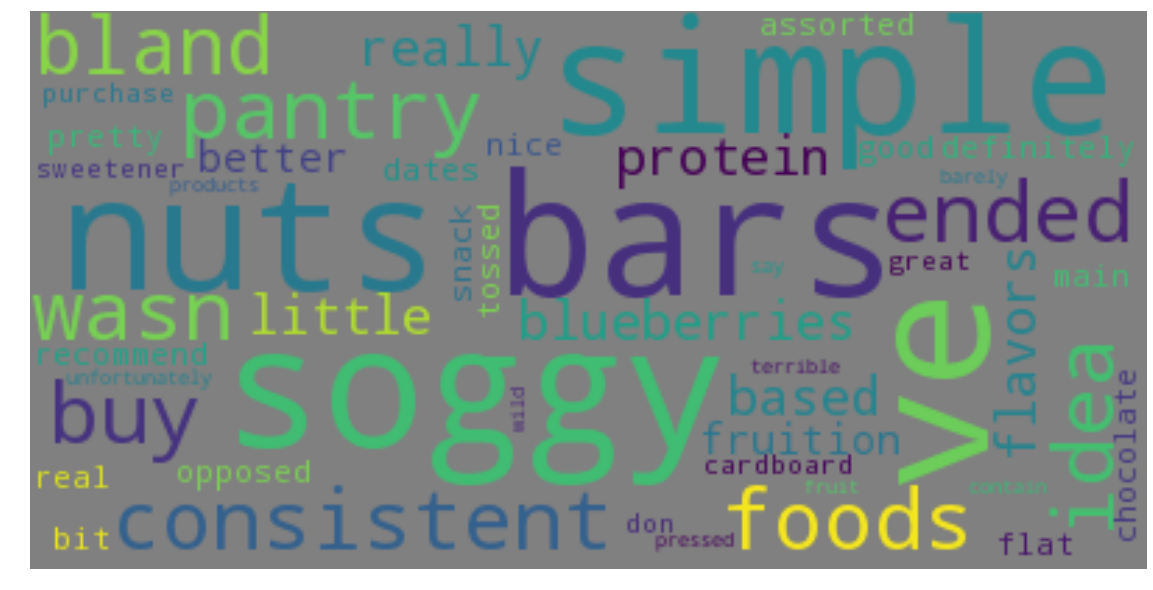

In [35]:
string = ' '.join(words)
cloud = WordCloud(background_color='gray', max_font_size=60, 
                                relative_scaling=1).generate(string)
fig = plt.figure(figsize=(20, 10))
plt.axis('off')
plt.imshow(cloud);